In [4]:
!pip install pandas

In [2]:
import pandas as pd
import numpy as np

#Visualization modules
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
from matplotlib import cm #Colormap

In [3]:
df_apr14=pd.read_csv(r'C:\Users\patil\Desktop\Uber Data Analysis\dataset\uber-raw-data-apr14.csv')
df_may14=pd.read_csv(r'C:\Users\patil\Desktop\Uber Data Analysis\dataset\uber-raw-data-may14.csv')
df_jun14=pd.read_csv(r'C:\Users\patil\Desktop\Uber Data Analysis\dataset\uber-raw-data-jun14.csv')
df_jul14=pd.read_csv(r'C:\Users\patil\Desktop\Uber Data Analysis\dataset\uber-raw-data-jul14.csv')
df_aug14=pd.read_csv(r'C:\Users\patil\Desktop\Uber Data Analysis\dataset\uber-raw-data-aug14.csv')
df_sep14=pd.read_csv(r'C:\Users\patil\Desktop\Uber Data Analysis\dataset\uber-raw-data-sep14.csv')

In [4]:
df = pd.concat([df_apr14, df_may14, df_jun14, df_jul14, df_aug14, df_sep14], ignore_index=True)

In [5]:
df.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date/Time  object 
 1   Lat        float64
 2   Lon        float64
 3   Base       object 
dtypes: float64(2), object(2)
memory usage: 138.4+ MB


In [7]:
# Renaming the Date/Time Column
df = df.rename(columns={'Date/Time': 'Date_time'})

# Converting the Date_time type into Datetime
df['Date_time'] = pd.to_datetime(df['Date_time'])

# Adding useful columns
df['Month'] = df['Date_time'].dt.month_name()
df['Weekday'] = df['Date_time'].dt.day_name() 
df['Day'] = df['Date_time'].dt.day
df['Hour'] = df['Date_time'].dt.hour
df['Minute'] = df['Date_time'].dt.minute

In [8]:
df.head()

,Date_time,Lat,Lon,Base,Month,Weekday,Day,Hour,Minute
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,April,Tuesday,1,0,11
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,April,Tuesday,1,0,17
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,April,Tuesday,1,0,21
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,April,Tuesday,1,0,28
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,April,Tuesday,1,0,33


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 9 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Date_time  datetime64[ns]
 1   Lat        float64       
 2   Lon        float64       
 3   Base       object        
 4   Month      object        
 5   Weekday    object        
 6   Day        int32         
 7   Hour       int32         
 8   Minute     int32         
dtypes: datetime64[ns](1), float64(2), int32(3), object(3)
memory usage: 259.5+ MB


In [10]:
df.describe(include = 'all')

,Date_time,Lat,Lon,Base,Month,Weekday,Day,Hour,Minute
count,4534327,4.534327e+06,4.534327e+06,4534327,4534327,4534327,4.534327e+06,4.534327e+06,4.534327e+06
unique,NaN,NaN,NaN,5,6,7,NaN,NaN,NaN
top,NaN,NaN,NaN,B02617,September,Thursday,NaN,NaN,NaN
freq,NaN,NaN,NaN,1458853,1028136,755145,NaN,NaN,NaN
mean,2014-07-11 18:50:50.578151424,4.073926e+01,-7.397302e+01,NaN,NaN,NaN,1.594337e+01,1.421831e+01,2.940071e+01
min,2014-04-01 00:00:00,3.965690e+01,-7.492900e+01,NaN,NaN,NaN,1.000000e+00,0.000000e+00,0.000000e+00
25%,2014-05-28 15:18:00,4.072110e+01,-7.399650e+01,NaN,NaN,NaN,9.000000e+00,1.000000e+01,1.400000e+01
50%,2014-07-17 14:45:00,4.074220e+01,-7.398340e+01,NaN,NaN,NaN,1.600000e+01,1.500000e+01,2.900000e+01
75%,2014-08-27 21:55:00,4.076100e+01,-7.396530e+01,NaN,NaN,NaN,2.300000e+01,1.900000e+01,4.400000e+01
max,2014-09-30 22:59:00,4.211660e+01,-7.206660e+01,NaN,NaN,NaN,3.100000e+01,2.300000e+01,5.900000e+01


## Data cleaning done , Now grouping and doing the visualization part 

In [12]:
#Grouping by Hour 
df_hour_grouped = df.groupby(['Hour']).count()

#Creating the sub dataframe
df_hour = pd.DataFrame({'Number_of_trips':df_hour_grouped.values[:,0]}, index = df_hour_grouped.index) 

df_hour.head()

,Number_of_trips
Hour,
0,103836
1,67227
2,45865
3,48287
4,55230


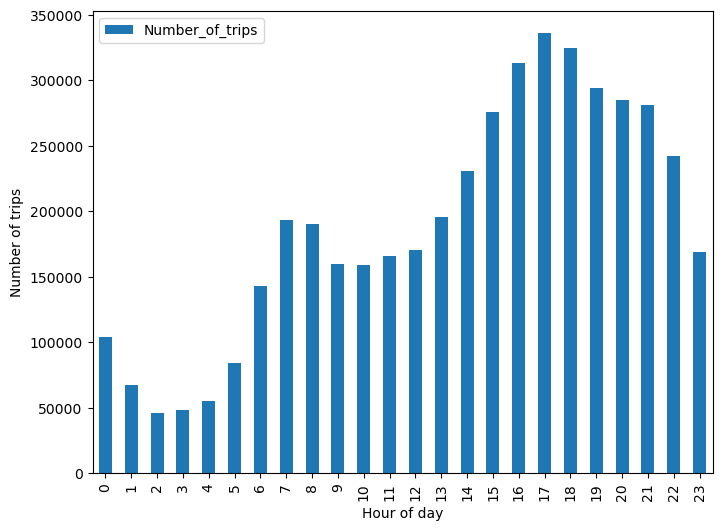

In [13]:
df_hour.plot(kind='bar', figsize=(8,6))
plt.ylabel('Number of trips')
plt.xlabel('Hour of day')
plt.show()

In [14]:
#The highest number of trips by hour
max_Number_of_trips_hour = max(df_hour['Number_of_trips'])
max_hour = df_hour[df_hour['Number_of_trips'] == 336190].index[0]

print('The highest number of trips by hour is {} trip, that corresponds to the peak hour {}:00.'.format(max_Number_of_trips_hour, max_hour))

The highest number of trips by hour is 336190 trip, that corresponds to the peak hour 17:00.


In [15]:
#Grouping by Month 
df_month_grouped = df.groupby(['Month'], sort=False).count()

#Creating the sub dataframe
df_month = pd.DataFrame({'Number_of_trips':df_month_grouped.values[:,0]}, index = df_month_grouped.index) 

df_month

,Number_of_trips
Month,
April,564516
May,652435
June,663844
July,796121
August,829275
September,1028136


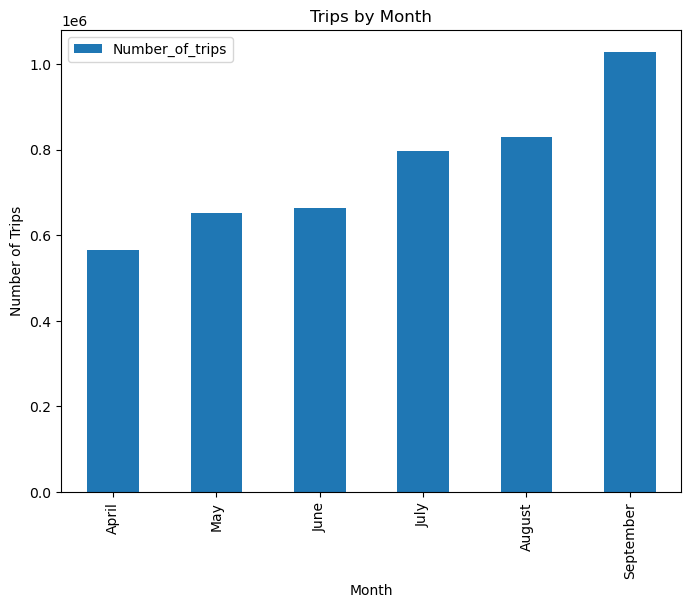

In [16]:
df_month.plot(kind='bar', figsize=(8,6))

plt.ylabel('Number of Trips')
plt.title('Trips by Month')

plt.show()

In [17]:
#Grouping by Weekday
df_weekday_grouped = df.groupby(['Weekday'], sort = False).count()

#Creating the grouped DataFrame
df_weekday = pd.DataFrame({'Number_of_trips':df_weekday_grouped.values[:,0]}, index = df_weekday_grouped.index) 

df_weekday

,Number_of_trips
Weekday,
Tuesday,663789
Wednesday,696488
Thursday,755145
Friday,741139
Saturday,646114
Sunday,490180
Monday,541472


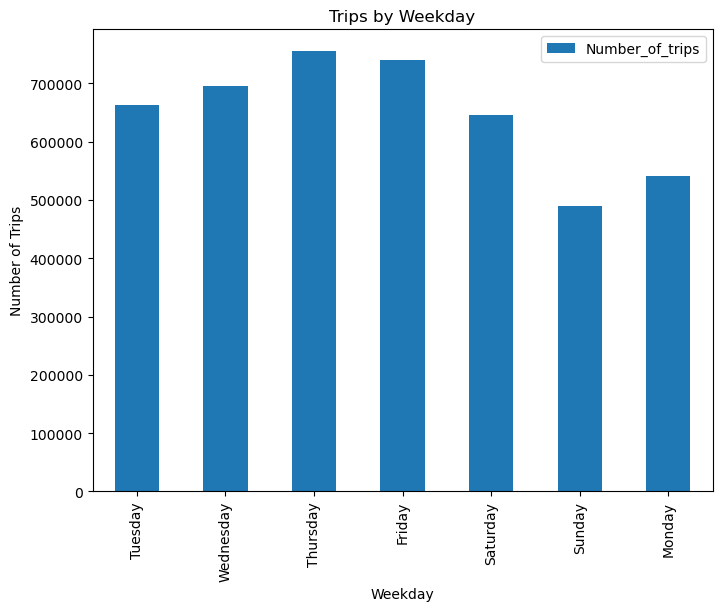

In [18]:
df_weekday.plot(kind='bar', figsize=(8,6))

plt.ylabel('Number of Trips')
plt.title('Trips by Weekday')

plt.show()

In [19]:
#Getting the minimum number of trips by weekday
min_number_of_trips_weekday = min(df_weekday['Number_of_trips'])

#Getting the weekday where the number of trips is minimal
min_weekday = df_weekday[df_weekday['Number_of_trips'] == min_number_of_trips_weekday].index[0]

print('The lowest number of trips by weekday is {} trip, that corresponds to {}.'.format(min_number_of_trips_weekday, min_weekday))

The lowest number of trips by weekday is 490180 trip, that corresponds to Sunday.


In [20]:
#Getting the mean number of trips in the weekend - Non working day
mean_number_of_trips_weekend = ((df_weekday.loc['Saturday'] + df_weekday.loc['Sunday']) / 2).values

#Getting the mean number of trips for the rest of the week- Working day
mean_number_of_trips_workday = (((df_weekday.loc['Monday'] + df_weekday.loc['Tuesday'] + df_weekday.loc['Wednesday'] + df_weekday.loc['Thursday'] + df_weekday.loc['Friday'])/ 5).values)[0]

ratio_weekday = (((mean_number_of_trips_workday - mean_number_of_trips_weekend) / mean_number_of_trips_weekend) * 100)[0]
ratio_weekday = round(ratio_weekday, 1)

print('The mean number of trips during working days is {}% higher than the mean number of trips during weekends.'.format(ratio_weekday))

The mean number of trips during working days is 19.6% higher than the mean number of trips during weekends.


### after the analysis we can say that
As the ratio between workdays and weekends only 19.6%, and because of the low number of trips on Monday, it cannot be said that people use Uber on workdays more than on weekends.

We need to investigate more to find out why the number of trips on mondays is as low.

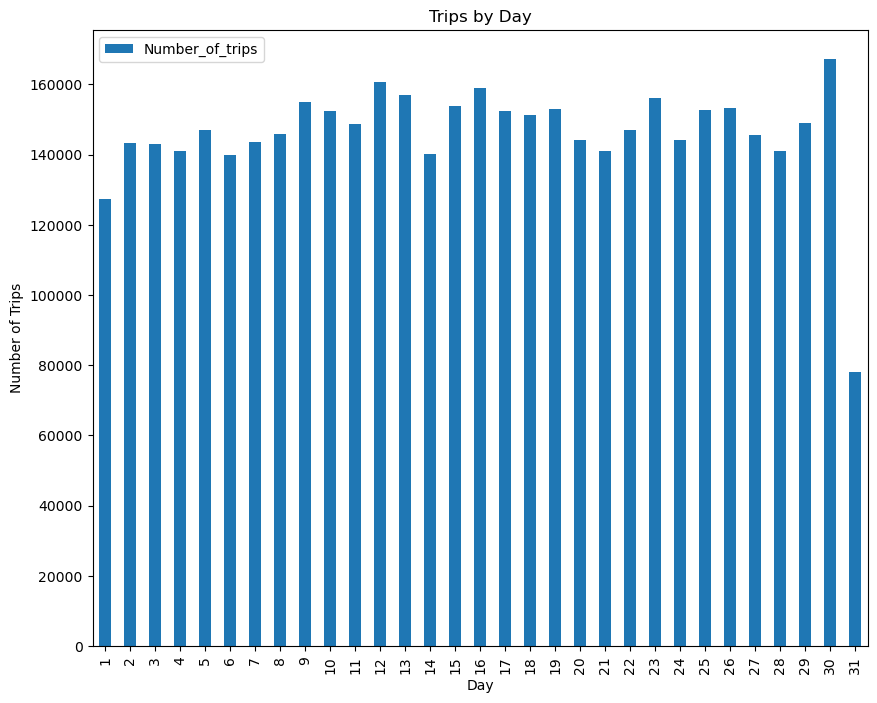

In [22]:
#Grouping by Day
df_day_grouped = df.groupby(['Day']).count()

#Creating the grouped DataFrame
df_day = pd.DataFrame({'Number_of_trips':df_day_grouped.values[:,0]}, index = df_day_grouped.index) 

df_day.head()

df_day.plot(kind='bar', figsize=(10,8))

plt.ylabel('Number of Trips')
plt.title('Trips by Day')

plt.show()

####isse pata chala ki day to day also theres almost similar no. of trips

In [24]:
#hour and month wise 

#Grouping by Hour and Month
df_hour_month_grouped = df.groupby(['Hour','Month']).count()

#Creating the grouped DataFrame
df_hour_month = pd.DataFrame({'Number_of_trips':df_hour_month_grouped.values[:,1]}, index = df_hour_month_grouped.index) 

df_hour_month.head(12)

Number_of_trips
Hour Month                     
0    April                11910
     August               21451
     July                 17953
     June                 14514
     May                  13875
     September            24133
1    April                 7769
     August               14471
     July                 11527
     June                  9167
     May                   8186
     September            16107

In [25]:
#Reseting the Index
df_hour_month.reset_index(inplace= True)
df_hour_month.head()

,Hour,Month,Number_of_trips
0,0,April,11910
1,0,August,21451
2,0,July,17953
3,0,June,14514
4,0,May,13875


In [26]:
#Preparing the Number of trips data
#We create a Numpy array that includes the Number of trips data then reshape it to fit our 
data_hour_month = df_hour_month['Number_of_trips'].values.reshape(24,6)
data_hour_month

array([[11910, 21451, 17953, 14514, 13875, 24133],
       [ 7769, 14471, 11527,  9167,  8186, 16107],
       [ 4935, 10105,  8562,  6189,  5372, 10702],
       [ 5040, 10376,  9199,  6937,  5946, 10789],
       [ 6095, 11774, 10040,  7701,  6945, 12675],
       [ 9476, 16525, 14932, 11955, 10789, 20262],
       [18498, 24907, 23456, 22030, 21015, 33307],
       [24924, 34064, 32545, 30834, 27413, 43314],
       [22843, 34566, 33387, 29771, 25460, 44477],
       [17939, 30195, 28486, 24298, 20507, 38542],
       [17865, 30706, 28558, 23584, 20801, 37634],
       [18774, 31778, 30120, 24155, 22055, 38821],
       [19425, 32106, 30900, 25233, 23595, 39193],
       [22603, 35764, 35832, 28937, 27699, 45042],
       [27190, 40644, 41357, 34428, 34363, 52643],
       [35324, 48197, 46053, 41586, 43087, 61219],
       [42003, 53481, 52403, 48162, 49127, 68224],
       [45475, 57122, 58260, 50452, 51508, 73373],
       [43003, 55390, 57268, 45013, 48965, 75040],
       [38923, 53008, 52332, 38

In [27]:
df_hour_month = pd.DataFrame(data = data_hour_month, index = df_hour_month['Hour'].unique(), columns = df['Month'].unique())
df_hour_month.head()

,April,May,June,July,August,September
0,11910,21451,17953,14514,13875,24133
1,7769,14471,11527,9167,8186,16107
2,4935,10105,8562,6189,5372,10702
3,5040,10376,9199,6937,5946,10789
4,6095,11774,10040,7701,6945,12675


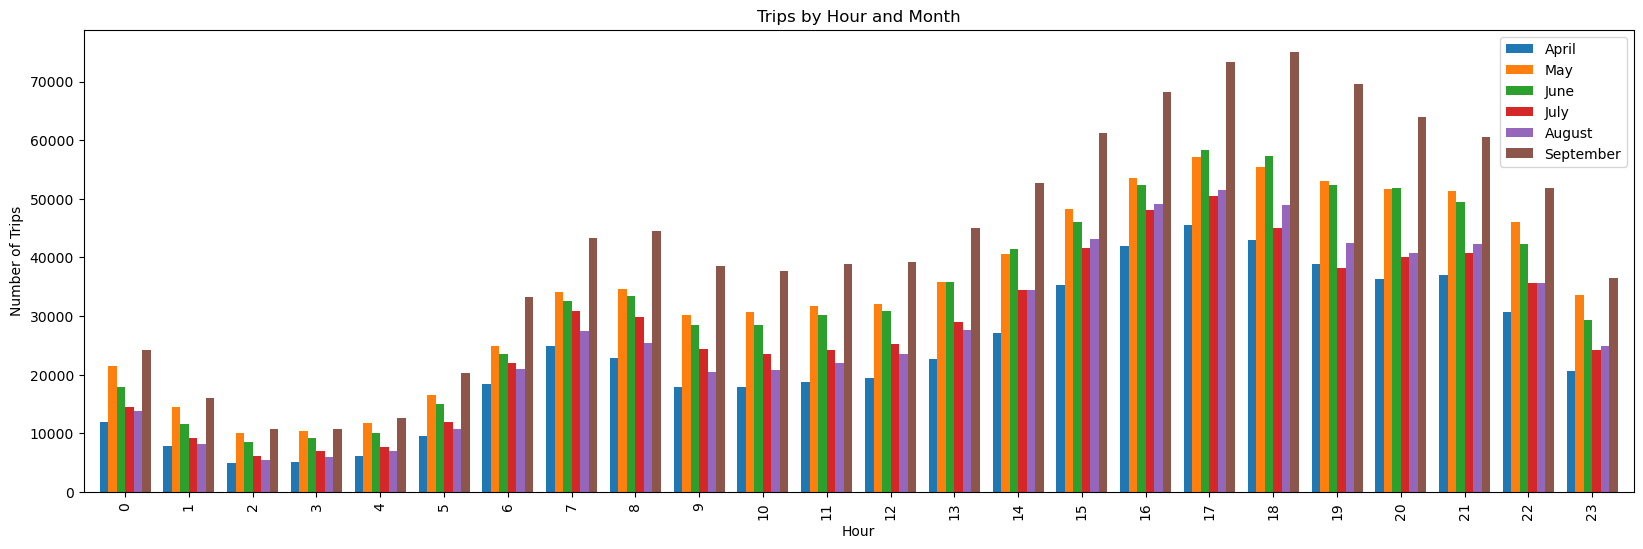

In [28]:
df_hour_month.plot(kind='bar', figsize=(20,6),width=0.8)

plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.title('Trips by Hour and Month')

plt.show()

In [29]:
#Grouping by Hour and weekday
df_weekday_hour_grouped = df.groupby(['Weekday','Hour'], sort = False).count()

#Creating the grouped DataFrame
df_weekday_hour = pd.DataFrame({'Number_of_trips':df_weekday_hour_grouped.values[:,1]}, index = df_weekday_hour_grouped.index) 

df_weekday_hour

Number_of_trips
Weekday Hour                 
Tuesday 0                6237
        1                3509
        2                2571
        3                4494
        4                7548
...                       ...
Monday  19              34159
        20              32849
        21              28925
        22              20158
        23              11811

[168 rows x 1 columns]

In [30]:
#Reseting the Index
df_weekday_hour.reset_index(inplace= True)

#Preparing the Number of trips data
data_weekday_hour = df_weekday_hour['Number_of_trips'].values.reshape(7,24)

df_weekday_hour = pd.DataFrame(data = data_weekday_hour, index = df_weekday_hour['Weekday'].unique(), columns = df['Hour'].unique())
df_weekday_hour.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Tuesday,6237,3509,2571,4494,7548,14241,26872,36599,33934,25023,...,34846,41338,48667,55500,50186,44789,44661,39913,27712,14869
Wednesday,7644,4324,3141,4855,7511,13794,26943,36495,33826,25635,...,35148,43388,50684,55637,52732,47017,47772,44553,32868,18146
Thursday,9293,5290,3719,5637,8505,14169,27065,37038,35431,27812,...,36699,44442,50560,56704,55825,51907,51990,51953,44194,27764
Friday,13716,8163,5350,6930,8806,13450,23412,32061,31509,25230,...,36206,43673,48169,51961,54762,49595,43542,48323,49409,41260
Saturday,27633,19189,12710,9542,6846,7084,8579,11014,14411,17669,...,31418,38769,43512,42844,45883,41098,38714,43826,47951,43174


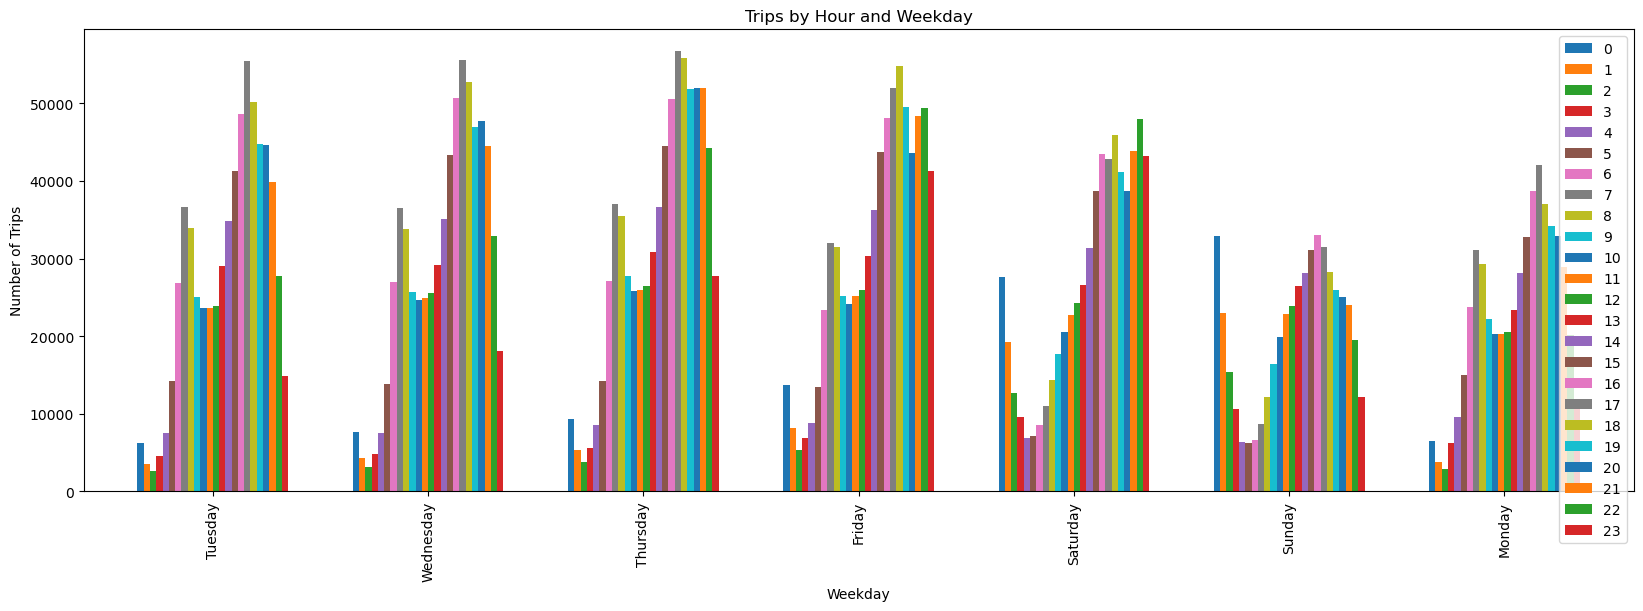

In [31]:
df_weekday_hour.plot(kind='bar', figsize=(20,6), width = 0.7)

plt.xlabel('Weekday')
plt.ylabel('Number of Trips')
plt.title('Trips by Hour and Weekday')

plt.show()

In [32]:
#Analysing the results
#We see that in working days there's a pulse at 7:00 and 8:00, it corresponds to the hour where the employees go to work. 
#This pulse is not present on weekend days.
#At the same time we see that on weekend days the number of trips around midnight, 1:00 and 2:00 is higher than on working days.

In [33]:
#Grouping by Weekday and Month
df_month_weekday_grouped = df.groupby(['Month','Weekday'], sort=False).count()

#Creating the grouped DataFrame
df_month_weekday = pd.DataFrame({'Number_of_trips':df_month_weekday_grouped.values[:,1]}, index = df_month_weekday_grouped.index) 

df_month_weekday.head(10)

Number_of_trips
Month Weekday                   
April Tuesday              91185
      Wednesday           108631
      Thursday             85067
      Friday               90303
      Saturday             77218
      Sunday               51251
      Monday               60861
May   Thursday            128921
      Friday              133991
      Saturday            102990

In [34]:
#Reseting the Index
df_month_weekday.reset_index(inplace= True)

#Preparing the Number of trips 
data_month_weekday = df_month_weekday['Number_of_trips'].values.reshape(6,7)

df_month_weekday = pd.DataFrame(data = data_month_weekday, index = df_month_weekday['Month'].unique(), columns = df['Weekday'].unique())
df_month_weekday.head()


,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Monday
April,91185,108631,85067,90303,77218,51251,60861
May,128921,133991,102990,56168,63846,76662,89857
June,79656,94655,88134,99654,115325,105056,81364
July,137454,147717,148439,102735,90260,76327,93189
August,148674,132225,110246,91633,107124,115256,124117


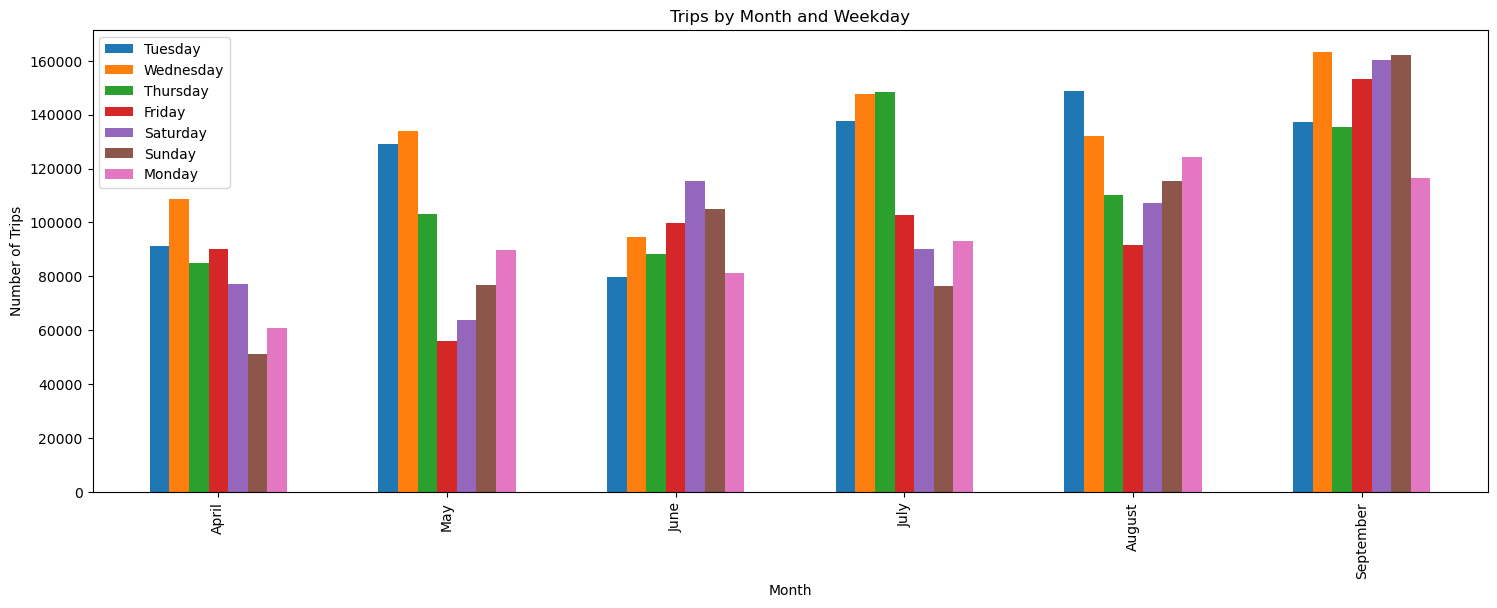

In [35]:
df_month_weekday.plot(kind='bar', figsize=(18,6), width = 0.6)

plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.title('Trips by Month and Weekday')

plt.show()

## Creating Heatmaps just for visualization

In [37]:
#Defining a function that counts the number of rows
def count_rows(rows):
    return len(rows)

In [38]:
#Creating the hour and day dataframe
df_hour_day = df.groupby('Hour Day'.split()).apply(count_rows).unstack()
df_hour_day.head()

C:\Users\patil\AppData\Local\Temp\ipykernel_12788\1979233098.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_hour_day = df.groupby('Hour Day'.split()).apply(count_rows).unstack()


Day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
Hour,,,,,,,,,,,,,,,,,,,,,
0,3247,2480,3415,2944,2786,4623,3715,2882,2708,3351,...,2852,2605,3277,2442,3887,5304,4224,2732,2439,2209
1,1982,1600,2176,1718,1567,2932,2326,1672,1757,2167,...,1662,1608,2090,1525,3123,3712,2711,1862,1547,1407
2,1284,1109,1434,1217,1047,1902,1533,1147,1246,1495,...,1207,1163,1480,1098,2087,2407,1894,1442,1135,1107
3,1331,1442,1489,1449,1278,1599,1622,1509,1501,1466,...,1503,1465,1520,1472,1840,2098,1846,1717,1436,935
4,1458,1897,1578,1737,1648,1584,1793,1921,1911,1614,...,1984,1994,1825,1972,1770,1759,1916,1990,1864,788


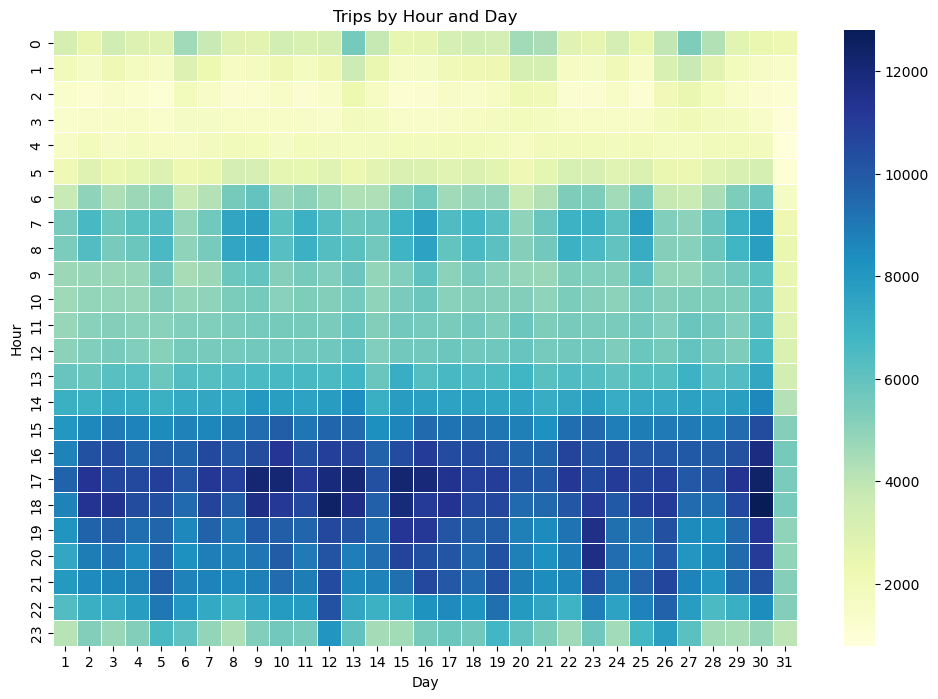

In [39]:
plt.figure(figsize = (12,8))

#Using the seaborn heatmap function 
ax = sns.heatmap(df_hour_day, cmap=cm.YlGnBu, linewidth = .5)
ax.set(title="Trips by Hour and Day");
plt.show()

In [40]:
df_hour_weekday = df.groupby('Hour Weekday'.split(), sort = False).apply(count_rows).unstack()
df_hour_weekday.head()

C:\Users\patil\AppData\Local\Temp\ipykernel_12788\739661458.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_hour_weekday = df.groupby('Hour Weekday'.split(), sort = False).apply(count_rows).unstack()


Weekday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Monday
Hour,,,,,,,
0,6237,7644,9293,13716,27633,32877,6436
1,3509,4324,5290,8163,19189,23015,3737
2,2571,3141,3719,5350,12710,15436,2938
3,4494,4855,5637,6930,9542,10597,6232
4,7548,7511,8505,8806,6846,6374,9640


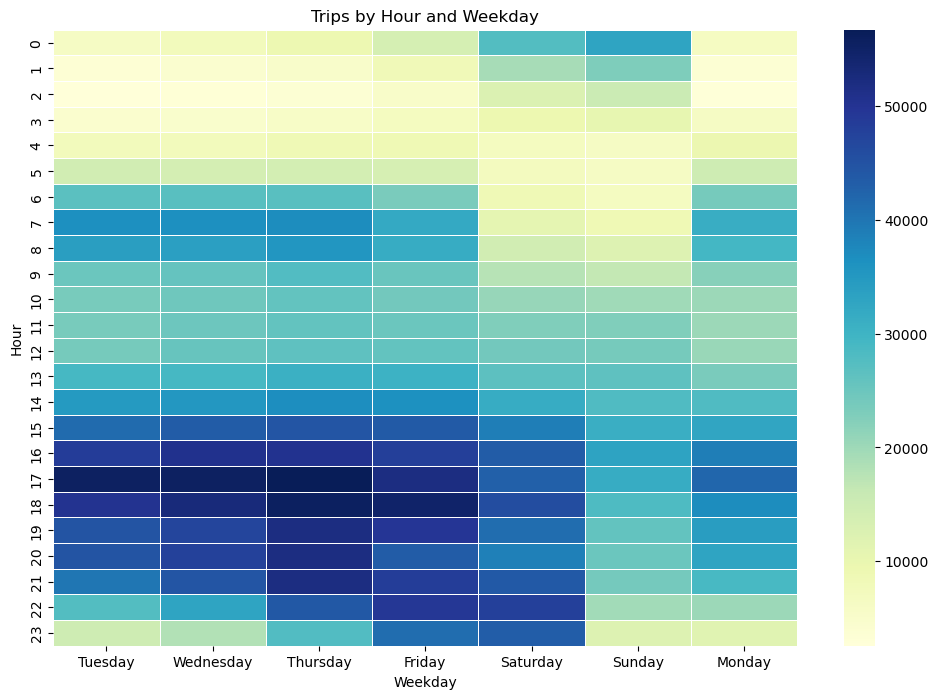

In [41]:
plt.figure(figsize = (12,8))

ax = sns.heatmap(df_hour_weekday, cmap=cm.YlGnBu, linewidth = .5)
ax.set(title="Trips by Hour and Weekday");

plt.show()

In [42]:
df_day_month = df.groupby('Day Month'.split(), sort = False).apply(count_rows).unstack()
df_day_month.head()

C:\Users\patil\AppData\Local\Temp\ipykernel_12788\659767156.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_day_month = df.groupby('Day Month'.split(), sort = False).apply(count_rows).unstack()


Month,April,May,June,July,August,September
Day,,,,,,
1,14546.0,23375.0,15967.0,21228.0,32353.0,19961.0
2,17474.0,24235.0,17503.0,26480.0,28678.0,28831.0
3,20701.0,22234.0,22674.0,21597.0,23146.0,32631.0
4,26714.0,13918.0,22831.0,14148.0,24952.0,38360.0
5,19521.0,17859.0,28371.0,10890.0,28094.0,42319.0


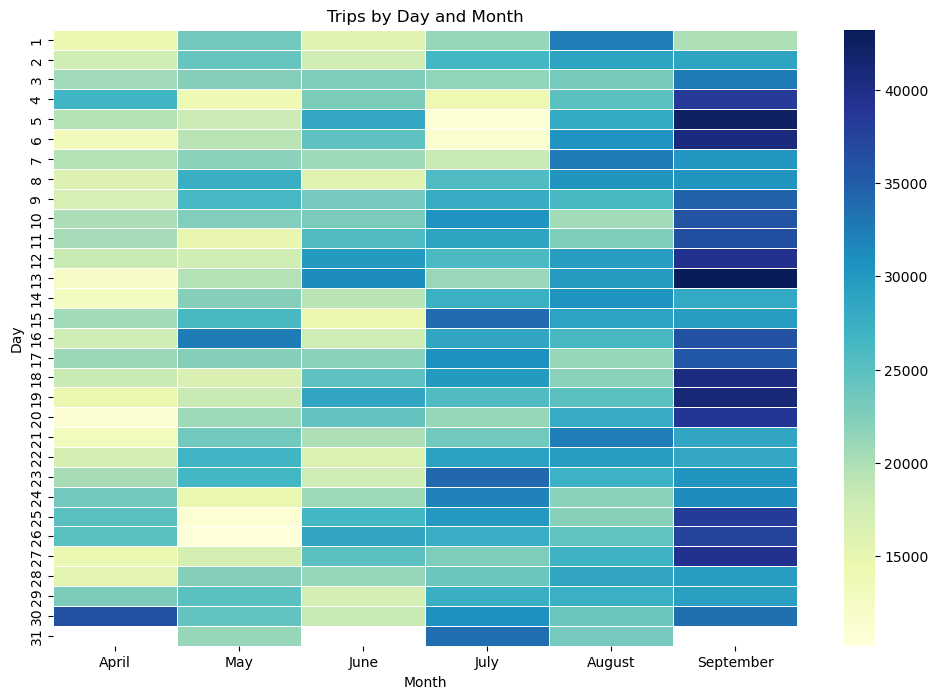

In [43]:
plt.figure(figsize = (12,8))

ax = sns.heatmap(df_day_month, cmap = cm.YlGnBu, linewidth = .5)
ax.set(title="Trips by Day and Month");
plt.show()

In [44]:
df_month_weekday = df.groupby('Month Weekday'.split(), sort = False).apply(count_rows).unstack()
df_month_weekday.head()

C:\Users\patil\AppData\Local\Temp\ipykernel_12788\3684975110.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_month_weekday = df.groupby('Month Weekday'.split(), sort = False).apply(count_rows).unstack()


Weekday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Monday
Month,,,,,,,
April,91185,108631,85067,90303,77218,51251,60861
May,76662,89857,128921,133991,102990,56168,63846
June,88134,99654,115325,105056,81364,79656,94655
July,137454,147717,148439,102735,90260,76327,93189
August,107124,115256,124117,148674,132225,110246,91633


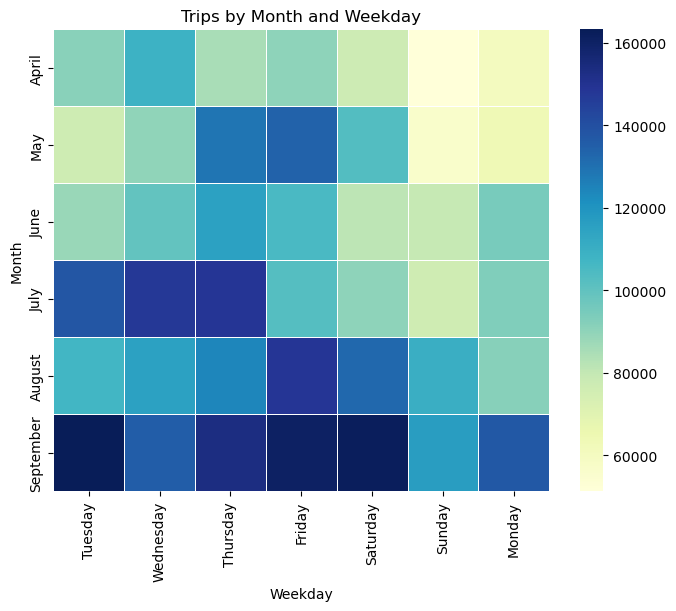

In [45]:
plt.figure(figsize = (8,6))

ax = sns.heatmap(df_month_weekday, cmap= cm.YlGnBu, linewidth = .5)
ax.set(title="Trips by Month and Weekday");
plt.show()

## Pickup Prediction

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [48]:
!pip install tensorflow

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [50]:
print (df.columns)

Index(['Date_time', 'Lat', 'Lon', 'Base', 'Month', 'Weekday', 'Day', 'Hour',
       'Minute'],
      dtype='object')


In [51]:
#loading data
df['Date_time'] = pd.to_datetime(df['Date_time'])
df['hour'] = df['Date_time'].dt.hour
df['Day'] = df['Date_time'].dt.day
df['Weekday'] = df['Date_time'].dt.weekday

In [52]:
#Grouping hour,day and weekday
pickup_df=df.groupby(['Hour','Day','Weekday']).size().reset_index(name='Pickups')

In [53]:
# Features and labels
X = pickup_df[['Hour','Day','Weekday']]
y = pickup_df['Pickups']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
#Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [55]:
#Artificial Neural Networks
model = Sequential([
    Dense(32, activation='relu', input_shape=(3,)),
    Dense(16, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=8)

C:\Users\patil\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
294/294 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 2256251.5000 - val_loss: 2117066.0000
Epoch 2/100
294/294 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1940071.7500 - val_loss: 1558611.8750
Epoch 3/100
294/294 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1497587.5000 - val_loss: 785690.3125
Epoch 4/100
294/294 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 702186.4375 - val_loss: 495577.3750
Epoch 5/100
294/294 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 491850.1562 - val_loss: 465359.1875
Epoch 6/100
294/294 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 487394.5938 - val_loss: 455336.8750
Epoch 7/100
294/294 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 466019.4688 - val_loss: 450521.0625
Epoch 8/100
294/294 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 440012.1562 - val_loss: 448650.8750
Epoch 9/100
294/294 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 466315.7812 - val_loss: 444040.5625
Epoch 10/100
294/294 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 523227.0312 - val_loss: 443670.1562
Epoch 11/100
294/294 ━━━

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


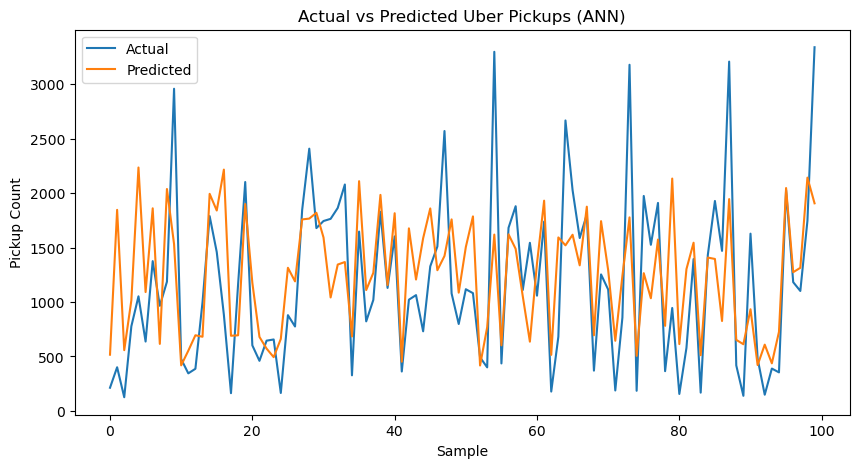

In [56]:
#plotting
preds = model.predict(X_test_scaled)

plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:100], label='Actual')
plt.plot(preds[:100], label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Uber Pickups (ANN)')
plt.xlabel('Sample')
plt.ylabel('Pickup Count')
plt.show()

In [57]:
# Flatten predictions if needed
y_pred_flat = preds.flatten()

# Compare actual vs predicted
comparison_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred_flat
})

# Display first 10 rows
comparison_df.head(10)

,Actual,Predicted
0,213,516.306274
1,401,1845.561646
2,126,557.861572
3,777,1015.545349
4,1052,2234.172363
5,637,1091.075684
6,1375,1859.604126
7,965,615.330505
8,1186,2036.827759
9,2957,1532.111572


In [58]:
mse_ann = mean_squared_error(y_test, y_pred_flat)

# RMSE
rmse_ann = np.sqrt(mse_ann)

print("Neural Network RMSE:", rmse_ann)

NameError: name 'mean_squared_error' is not defined

In [80]:
df.shape


(4534327, 10)

In [81]:
print("pickup_df shape:", pickup_df.shape)


pickup_df shape: (3671, 4)


In [82]:
files = [
    r'C:\Users\patil\Desktop\Uber Data Analysis\dataset\uber-raw-data-apr14.csv',
    r'C:\Users\patil\Desktop\Uber Data Analysis\dataset\uber-raw-data-may14.csv',
    r'C:\Users\patil\Desktop\Uber Data Analysis\dataset\uber-raw-data-jun14.csv',
    r'C:\Users\patil\Desktop\Uber Data Analysis\dataset\uber-raw-data-jul14.csv',
    r'C:\Users\patil\Desktop\Uber Data Analysis\dataset\uber-raw-data-aug14.csv',
    r'C:\Users\patil\Desktop\Uber Data Analysis\dataset\uber-raw-data-sep14.csv'
]


In [83]:
dfs = [pd.read_csv(f) for f in files]
combined_df = pd.concat(dfs, ignore_index=True)

In [84]:
print("Rows:", df.shape[0])

Rows: 4534327


In [85]:
print(df.columns)


Index(['Date_time', 'Lat', 'Lon', 'Base', 'Month', 'Weekday', 'Day', 'Hour',
       'Minute', 'hour'],
      dtype='object')


In [86]:
df['Date_time'] = pd.to_datetime(df['Date_time'])


In [87]:
df['Hour'] = df['Date_time'].dt.hour
df['Day'] = df['Date_time'].dt.day
df['Weekday'] = df['Date_time'].dt.weekday
df['Month'] = df['Date_time'].dt.month


In [88]:
df_hourly = df.set_index('Date_time').resample('H').size().to_frame('Pickups')
df_hourly = df_hourly.reset_index()


C:\Users\patil\AppData\Local\Temp\ipykernel_12788\397852939.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df.set_index('Date_time').resample('H').size().to_frame('Pickups')


In [89]:
print(df_hourly)

               Date_time  Pickups
0    2014-04-01 00:00:00      138
1    2014-04-01 01:00:00       66
2    2014-04-01 02:00:00       53
3    2014-04-01 03:00:00       93
4    2014-04-01 04:00:00      166
...                  ...      ...
4386 2014-09-30 18:00:00     2625
4387 2014-09-30 19:00:00     2404
4388 2014-09-30 20:00:00     2246
4389 2014-09-30 21:00:00     1961
4390 2014-09-30 22:00:00     1347

[4391 rows x 2 columns]


In [90]:
df_hourly['Hour'] = df_hourly['Date_time'].dt.hour
df_hourly['Day'] = df_hourly['Date_time'].dt.day
df_hourly['Weekday'] = df_hourly['Date_time'].dt.weekday
df_hourly['Month'] = df_hourly['Date_time'].dt.month


In [91]:
X = df_hourly[['Hour', 'Day', 'Weekday', 'Month']]
y = df_hourly['Pickups']


In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [93]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [94]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile
model.compile(optimizer='adam', loss='mse')

# Train
history = model.fit(
    X_train_scaled,
    y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16
)


Epoch 1/50


C:\Users\patil\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 1471668.6250 - val_loss: 1437668.3750
Epoch 2/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1249277.2500 - val_loss: 789120.1875
Epoch 3/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 557445.1250 - val_loss: 297228.0938
Epoch 4/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 230423.4531 - val_loss: 253039.3594
Epoch 5/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 221042.6562 - val_loss: 246924.7969
Epoch 6/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 217131.9531 - val_loss: 245297.0000
Epoch 7/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 207774.0938 - val_loss: 243845.0469
Epoch 8/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 200480.9375 - val_loss: 240525.9688
Epoch 9/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 207487.7031 - val_loss: 238966.6719
Epoch 10/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 201052.0469 - val_loss: 237226.2656
Epoch 11/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms

In [95]:
y_pred = model.predict(X_test_scaled)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [96]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Neural Network RMSE:", rmse)


Neural Network RMSE: 427.8002965753998


In [97]:
result_df = (
    pd.DataFrame({
        'Actual': y_test.values,
        'Predicted': y_pred.flatten()
    })
)

print(result_df.head(10))


   Actual    Predicted
0     156   755.933044
1     122   383.370972
2    2262  1887.133545
3     987   953.579895
4     277   539.359436
5     756   813.343079
6     131   230.683182
7     196   389.916687
8    1947  1275.499756
9     291   357.720825


## Trying Random Forest 

In [99]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [100]:
X = df_hourly[['Hour', 'Day', 'Weekday', 'Month']]
y = df_hourly['Pickups']


In [101]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [102]:
rf = RandomForestRegressor(
    n_estimators=200,  # 200 trees
    random_state=42,
    n_jobs=-1          # all CPU cores
)


In [103]:
rf.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)

In [104]:
y_pred_rf = rf.predict(X_test)


In [105]:
comparison_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred_rf
})

print(comparison_df.head(10))


   Actual  Predicted
0     156    168.575
1     122    140.945
2    2262   2193.435
3     987   1080.150
4     277    299.575
5     756    754.635
6     131    151.680
7     196    213.215
8    1947   1751.000
9     291    316.790


In [106]:
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("Random Forest RMSE:", rmse_rf)


Random Forest RMSE: 158.46525364085937


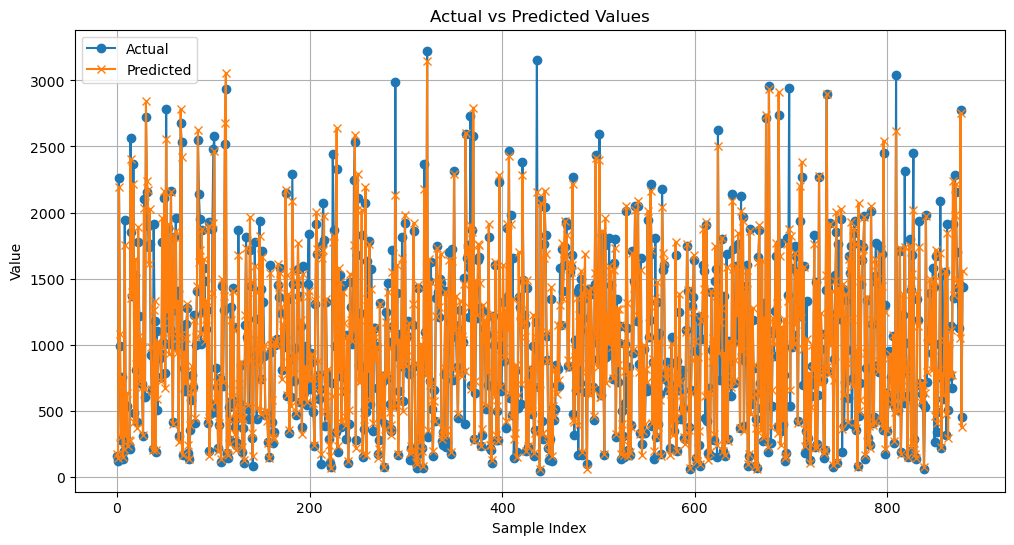

In [107]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(comparison_df['Actual'].values, label='Actual', marker='o')
plt.plot(comparison_df['Predicted'].values, label='Predicted', marker='x')
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


# As compared to ANN , the RMSE of Random Forest is Lesser